In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9077f397cb8a1391689922c8104c8fff


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.

Processing Record 1 of Set 13 | taolanaro
Processing Record 2 of Set 13 | navahrudak
Processing Record 3 of Set 13 | awjilah
Processing Record 4 of Set 13 | karratha
Processing Record 5 of Set 13 | kavieng
Processing Record 6 of Set 13 | san patricio
Processing Record 7 of Set 13 | mahebourg
Processing Record 8 of Set 13 | camacupa
Processing Record 9 of Set 13 | hamilton
Processing Record 10 of Set 13 | albany
Processing Record 11 of Set 13 | saint-francois
Processing Record 12 of Set 13 | agua branca
Processing Record 13 of Set 13 | roberto payan
Processing Record 14 of Set 13 | sovetskiy
Processing Record 15 of Set 13 | sexsmith
Processing Record 16 of Set 13 | maragogi
Processing Record 17 of Set 13 | dunedin
Processing Record 18 of Set 13 | jardim
Processing Record 19 of Set 13 | waddan
Processing Record 20 of Set 13 | puerto ayora
Processing Record 21 of Set 13 | dikson
Processing Record 22 of Set 13 | portland
Processing Record 23 of Set 13 | mitu
Processing Record 24 of Set 13 

In [12]:
try:
    # Parse the JSON and retrieve data.
    city_weather = requests.get(city_url).json()
    # Parse out the needed data.
    city_lat = city_weather["coord"]["lat"]
    city_lng = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    # Convert the date to ISO standard.
    city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
    # Append the city information into city_data list.
    city_data.append({"City": city.title(),
                      "Lat": city_lat,
                      "Lng": city_lng,
                      "Max Temp": city_max_temp,
                      "Humidity": city_humidity,
                      "Cloudiness": city_clouds,
                      "Wind Speed": city_wind,
                      "Country": city_country,
                      "Date": city_date})

# If an error is experienced, skip the city.
except:
    print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 2 of Set 13 | navahrudak
Processing Record 3 of Set 13 | awjilah
Processing Record 4 of Set 13 | karratha
Processing Record 5 of Set 13 | kavieng
Processing Record 6 of Set 13 | san patricio
Processing Record 7 of Set 13 | mahebourg
Processing Record 8 of Set 13 | camacupa
Processing Record 9 of Set 13 | hamilton
Processing Record 10 of Set 13 | albany
Processing Record 11 of Set 13 | saint-francois
Processing Record 12 of Set 13 | agua branca
Processing Record 13 of Set 13 | roberto payan
City not found. Skipping...
Processing Record 14 of Set 13 | sovetskiy
Processing Record 15 of Set 13 | sexsmith
Processing Record 16 of Set 13 | maragogi
Processing Record 17 of Set 13 | dunedin
Processing Record 18 of Set 13 | jardim
Processing Record 19 of Set 13 | waddan
Processing Record 20 of Set 13 | puerto ayora
Processing Record 21 of Set 13 | di

Processing Record 35 of Set 16 | chuy
Processing Record 36 of Set 16 | grand river south east
City not found. Skipping...
Processing Record 37 of Set 16 | saldanha
Processing Record 38 of Set 16 | port-cartier
Processing Record 39 of Set 16 | bethel
Processing Record 40 of Set 16 | ribeira grande
Processing Record 41 of Set 16 | tuktoyaktuk
Processing Record 42 of Set 16 | katha
City not found. Skipping...
Processing Record 43 of Set 16 | port-gentil
Processing Record 44 of Set 16 | akyab
Processing Record 45 of Set 16 | viedma
Processing Record 46 of Set 16 | hami
Processing Record 47 of Set 16 | zhangjiakou
Processing Record 48 of Set 16 | neuquen
Processing Record 49 of Set 16 | saint anthony
Processing Record 50 of Set 16 | fort nelson
Processing Record 1 of Set 17 | kearney
Processing Record 2 of Set 17 | vardo
Processing Record 3 of Set 17 | tapaua
City not found. Skipping...
Processing Record 4 of Set 17 | hualmay
Processing Record 5 of Set 17 | farah
Processing Record 6 of Set 

Processing Record 18 of Set 20 | taybad
Processing Record 19 of Set 20 | husavik
Processing Record 20 of Set 20 | raudeberg
Processing Record 21 of Set 20 | miri
Processing Record 22 of Set 20 | nongan
Processing Record 23 of Set 20 | san ramon
Processing Record 24 of Set 20 | gravelbourg
Processing Record 25 of Set 20 | alugan
Processing Record 26 of Set 20 | victoria
Processing Record 27 of Set 20 | huangpi
Processing Record 28 of Set 20 | acarau
Processing Record 29 of Set 20 | tifton
Processing Record 30 of Set 20 | griffith
Processing Record 31 of Set 20 | turbat
Processing Record 32 of Set 20 | vejle
Processing Record 33 of Set 20 | christchurch
Processing Record 34 of Set 20 | san quintin
Processing Record 35 of Set 20 | beaverlodge
Processing Record 36 of Set 20 | bindura
Processing Record 37 of Set 20 | hofn
Processing Record 38 of Set 20 | pevek
Processing Record 39 of Set 20 | pacific grove
Processing Record 40 of Set 20 | westport
Processing Record 41 of Set 20 | katsuura
P

City not found. Skipping...
Processing Record 9 of Set 24 | dillon
Processing Record 10 of Set 24 | gualeguaychu
Processing Record 11 of Set 24 | caraballeda
Processing Record 12 of Set 24 | carutapera
Processing Record 13 of Set 24 | buqayq
City not found. Skipping...
Processing Record 14 of Set 24 | itaituba
Processing Record 15 of Set 24 | samusu
City not found. Skipping...
Processing Record 16 of Set 24 | stepnyak
Processing Record 17 of Set 24 | iqaluit
Processing Record 18 of Set 24 | ugra
Processing Record 19 of Set 24 | katangli
Processing Record 20 of Set 24 | buin
Processing Record 21 of Set 24 | aksay
Processing Record 22 of Set 24 | sheffield
Processing Record 23 of Set 24 | port lincoln
Processing Record 24 of Set 24 | lakes entrance
Processing Record 25 of Set 24 | thinadhoo
Processing Record 26 of Set 24 | armidale
Processing Record 27 of Set 24 | zemio
Processing Record 28 of Set 24 | oktyabrskoye
Processing Record 29 of Set 24 | sumbe
Processing Record 30 of Set 24 | f

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Navahrudak,53.60,25.83,48.42,97,5,5.53,BY,2020-07-09 04:00:47
1,Awjilah,29.11,21.29,74.62,69,0,8.32,LY,2020-07-09 04:00:47
2,Karratha,-20.74,116.85,82.54,16,0,10.83,AU,2020-07-09 03:59:21
3,Kavieng,-2.57,150.80,85.19,71,84,11.86,PG,2020-07-09 04:00:47
4,San Patricio,19.22,-104.70,80.06,78,100,7.74,MX,2020-07-09 04:00:47
5,Mahebourg,-20.41,57.70,69.80,73,75,17.22,MU,2020-07-09 04:00:48
6,Camacupa,-12.02,17.48,45.86,51,0,4.41,AO,2020-07-09 04:00:48
7,Hamilton,39.18,-84.53,79.00,94,1,2.21,US,2020-07-09 04:00:02
8,Albany,42.60,-73.97,73.00,91,0,2.57,US,2020-07-09 04:00:03
9,Saint-Francois,46.42,3.91,54.00,81,28,2.24,FR,2020-07-09 04:00:48


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df.reindex(columns = new_column_order)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Navahrudak,BY,2020-07-09 04:00:47,53.60,25.83,48.42,97,5,5.53
1,Awjilah,LY,2020-07-09 04:00:47,29.11,21.29,74.62,69,0,8.32
2,Karratha,AU,2020-07-09 03:59:21,-20.74,116.85,82.54,16,0,10.83
3,Kavieng,PG,2020-07-09 04:00:47,-2.57,150.80,85.19,71,84,11.86
4,San Patricio,MX,2020-07-09 04:00:47,19.22,-104.70,80.06,78,100,7.74
5,Mahebourg,MU,2020-07-09 04:00:48,-20.41,57.70,69.80,73,75,17.22
6,Camacupa,AO,2020-07-09 04:00:48,-12.02,17.48,45.86,51,0,4.41
7,Hamilton,US,2020-07-09 04:00:02,39.18,-84.53,79.00,94,1,2.21
8,Albany,US,2020-07-09 04:00:03,42.60,-73.97,73.00,91,0,2.57
9,Saint-Francois,FR,2020-07-09 04:00:48,46.42,3.91,54.00,81,28,2.24


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'07/08/20'

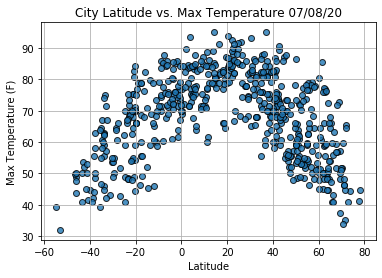

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

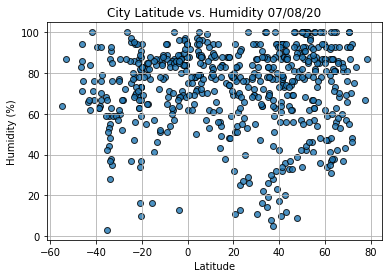

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

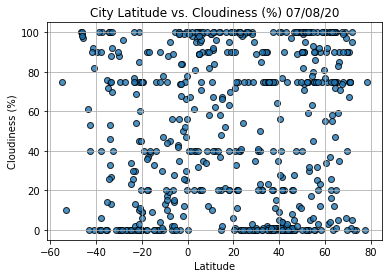

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

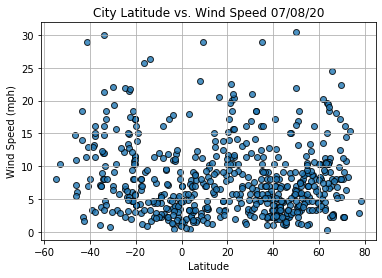

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()